In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Code


In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


heart_disease = fetch_ucirepo(id=45)


X = heart_disease.data.features
y = heart_disease.data.targets


categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = [col for col in X.columns if col not in categorical_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', num_imputer),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])


rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


rf_pipeline.fit(X_train, y_train.values.ravel())
lr_pipeline.fit(X_train, y_train.values.ravel())

rf_preds = rf_pipeline.predict(X_test)
lr_preds = lr_pipeline.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


Random Forest Classifier Accuracy: 0.5081967213114754
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        29
           1       0.09      0.08      0.09        12
           2       0.17      0.11      0.13         9
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.23      0.26      0.24        61
weighted avg       0.41      0.51      0.45        61

Logistic Regression Accuracy: 0.45901639344262296
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.00      0.00      0.00        12
           2       0.17      0.11      0.13         9
           3       0.25      0.57      0.35         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.24    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Modification

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


heart_disease = fetch_ucirepo(id=45)


X = heart_disease.data.features
y = heart_disease.data.targets

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = [col for col in X.columns if col not in categorical_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modification
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', num_imputer),
        ('scaler', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])


rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


rf_pipeline.fit(X_train, y_train.values.ravel())
lr_pipeline.fit(X_train, y_train.values.ravel())


rf_preds = rf_pipeline.predict(X_test)
lr_preds = lr_pipeline.predict(X_test)


print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


Random Forest Classifier Accuracy: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.12      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61

Logistic Regression Accuracy: 0.47540983606557374
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.00      0.00      0.00        12
           2       0.20      0.11      0.14         9
           3       0.27      0.57      0.36         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.25    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Comparision

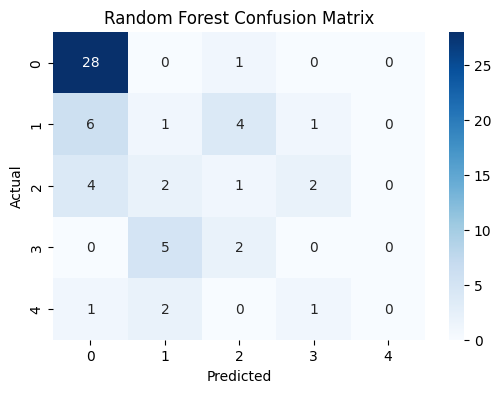

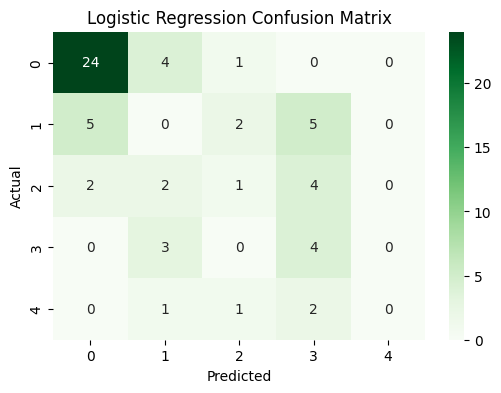

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_preds)
lr_cm = confusion_matrix(y_test, lr_preds)


plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
